In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [2]:
ticker = 'PG' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())

In [3]:
log_returns.tail()

,PG
Date,
2019-01-30,0.010422
2019-01-31,0.020421
2019-02-01,0.010313
2019-02-04,0.005729
2019-02-05,-0.006037


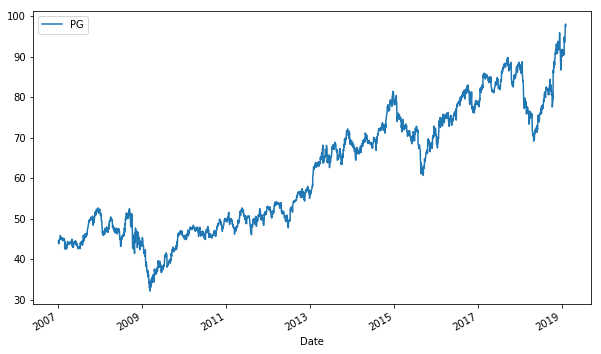

In [4]:
data.plot(figsize=(10, 6));

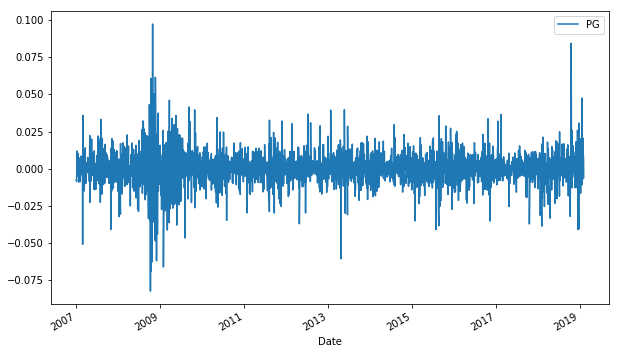

In [5]:
log_returns.plot(figsize = (10, 6))

In [6]:
u = log_returns.mean()
u

PG    0.000257
dtype: float64

In [7]:
var = log_returns.var()
var

PG    0.000121
dtype: float64

In [8]:
drift = u - (0.5 * var)
drift

PG    0.000196
dtype: float64

In [9]:
stdev = log_returns.std()
stdev

PG    0.011019
dtype: float64

******

In [10]:
type(drift)

pandas.core.series.Series

In [11]:
type(stdev)

pandas.core.series.Series

In [12]:
np.array(drift)

array([ 0.00019633])

In [13]:
drift.values

array([ 0.00019633])

In [14]:
stdev.values

array([ 0.01101926])

In [15]:
norm.ppf(0.95)

1.6448536269514722

In [16]:
x = np.random.rand(10, 2)
x

array([[ 0.54992849,  0.6587305 ],
       [ 0.74919619,  0.94750266],
       [ 0.55080255,  0.08781952],
       [ 0.63786917,  0.37898905],
       [ 0.6452714 ,  0.27013502],
       [ 0.21001414,  0.5350105 ],
       [ 0.25417954,  0.34235675],
       [ 0.27093788,  0.03887793],
       [ 0.16252182,  0.82506838],
       [ 0.18810129,  0.24620942]])

In [17]:
norm.ppf(x)

array([[ 0.12548068,  0.40900089],
       [ 0.67196242,  1.62110706],
       [ 0.12768926, -1.35430517],
       [ 0.35276896, -0.30813698],
       [ 0.37258519, -0.6124047 ],
       [-0.80637217,  0.08787127],
       [-0.66139493, -0.40603961],
       [-0.60997895, -1.76385818],
       [-0.98414617,  0.93485459],
       [-0.88491482, -0.68646672]])

In [18]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-2.58863549, -1.29702482],
       [-1.31039904,  0.30623754],
       [ 0.694622  , -0.27890169],
       [ 1.77822996, -1.37180178],
       [-1.2681982 ,  0.47472068],
       [ 0.30441114,  1.46829555],
       [ 0.7977426 , -0.58965536],
       [ 0.35198192,  2.37550513],
       [-2.29753372,  0.44922   ],
       [ 0.59514389,  0.55130903]])

In [19]:
t_intervals = 1000
iterations = 10

$$
daily\_returns = e^{r}
$$

$$
r = drift + stdev \cdot z
$$

In [20]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [21]:
daily_returns

array([[ 0.99887515,  0.97482515,  0.99045435, ...,  1.00040424,
         1.00766094,  1.00208465],
       [ 0.9974519 ,  1.00714185,  0.98002891, ...,  0.99450592,
         0.99467658,  1.00222975],
       [ 0.9968426 ,  1.00384444,  0.99627464, ...,  1.01731856,
         0.98438143,  0.97876956],
       ..., 
       [ 0.99655453,  0.9955295 ,  1.01312964, ...,  0.99647648,
         0.99455378,  1.015558  ],
       [ 1.00652531,  1.02057152,  0.99667933, ...,  0.98353359,
         1.00832674,  0.99575856],
       [ 0.99854878,  1.00447671,  0.99943732, ...,  1.00624054,
         0.99479528,  0.99113719]])